<a href="https://colab.research.google.com/github/Ajay-user/Bulldozer-Price-Prediction/blob/main/Bulldozer_price_prediction_encoded_categorical_features_using_category_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Problem definition
Blue Book for Bulldozers
Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.

Fast Iron is creating a "blue book for bull dozers," for customers to value what their heavy equipment fleet is worth at auction.

link : https://www.kaggle.com/c/bluebook-for-bulldozers/overview

# Data

You are predicting the sale price of bulldozers sold at auctions.

The data for this competition is split into three parts:

Train.csv is the training set, which contains data through the end of 2011.

Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 

Test.csv is the test set, it contains data from May 1, 2012 - November 2012. 

# Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.


# Import the data

link : https://www.kaggle.com/c/bluebook-for-bulldozers/data

In [8]:
# import the train and validation data 
bulldozer_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bullldozer Price Prediction/TrainAndValid.csv', 
                             low_memory=False,
                             parse_dates=['saledate'])

# import the test data
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bullldozer Price Prediction/Test.csv',
                        low_memory=False,
                        parse_dates=['saledate'])



# Exploratory Data Analysis


## View the Training data

In [9]:
# view the train and valid dataset
bulldozer_data.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# find the columns in test-valid data-set
bulldozer_data.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

## Check of unique values in Train - Valid set

In [11]:
# Count distinct observations
for col in bulldozer_data.columns:
  print(col," has {0} unique values , dtype is {1}".format(bulldozer_data[col].nunique(), bulldozer_data[col].dtype))
print('Total number of columns',len(bulldozer_data.columns))

SalesID  has 412698 unique values , dtype is int64
SalePrice  has 954 unique values , dtype is float64
MachineID  has 348808 unique values , dtype is int64
ModelID  has 5281 unique values , dtype is int64
datasource  has 6 unique values , dtype is int64
auctioneerID  has 30 unique values , dtype is float64
YearMade  has 73 unique values , dtype is int64
MachineHoursCurrentMeter  has 15633 unique values , dtype is float64
UsageBand  has 3 unique values , dtype is object
saledate  has 4013 unique values , dtype is datetime64[ns]
fiModelDesc  has 5059 unique values , dtype is object
fiBaseModel  has 1961 unique values , dtype is object
fiSecondaryDesc  has 177 unique values , dtype is object
fiModelSeries  has 123 unique values , dtype is object
fiModelDescriptor  has 140 unique values , dtype is object
ProductSize  has 6 unique values , dtype is object
fiProductClassDesc  has 74 unique values , dtype is object
state  has 53 unique values , dtype is object
ProductGroup  has 6 unique value

## View the Test data

In [12]:
test_data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [13]:
# check the columns of test dataset
test_data.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

## Check the unique values in Test set

In [14]:
# Count distinct observations
for col in test_data.columns:
  print(col," has {0} unique values , dtype is {1}".format(test_data[col].nunique(), test_data[col].dtype))
print('Total number of columns',len(test_data.columns))

SalesID  has 12457 unique values , dtype is int64
MachineID  has 11624 unique values , dtype is int64
ModelID  has 1984 unique values , dtype is int64
datasource  has 3 unique values , dtype is int64
auctioneerID  has 14 unique values , dtype is int64
YearMade  has 57 unique values , dtype is int64
MachineHoursCurrentMeter  has 1513 unique values , dtype is float64
UsageBand  has 3 unique values , dtype is object
saledate  has 144 unique values , dtype is datetime64[ns]
fiModelDesc  has 1941 unique values , dtype is object
fiBaseModel  has 831 unique values , dtype is object
fiSecondaryDesc  has 82 unique values , dtype is object
fiModelSeries  has 63 unique values , dtype is object
fiModelDescriptor  has 74 unique values , dtype is object
ProductSize  has 6 unique values , dtype is object
fiProductClassDesc  has 70 unique values , dtype is object
state  has 51 unique values , dtype is object
ProductGroup  has 6 unique values , dtype is object
ProductGroupDesc  has 6 unique values , dt

## Check for missing values in Train-Valid set



In [15]:
# check for missing values 
bulldozer_data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

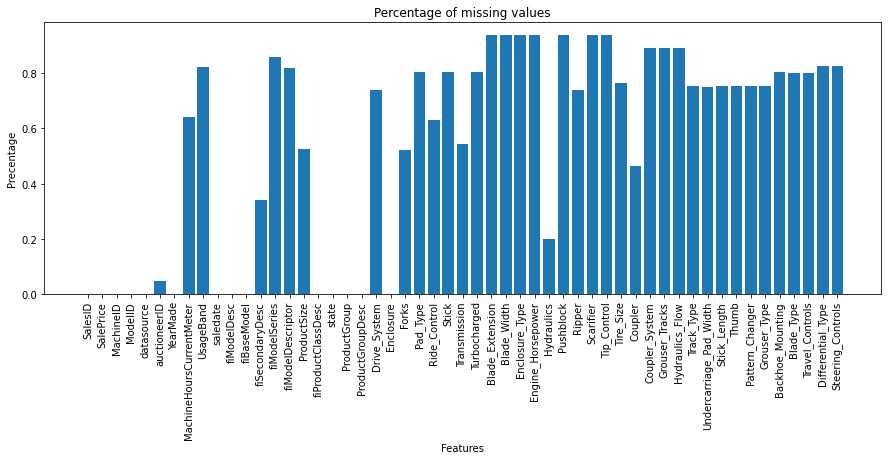

In [16]:
# check the precentage of missing values
# bulldozer_data.isna().sum() / len(bulldozer_data)
plt.figure(figsize=(15,5))
plt.bar(bulldozer_data.columns, bulldozer_data.isna().sum() / len(bulldozer_data))
plt.xticks(ticks=range(len(bulldozer_data.columns)),
           labels=bulldozer_data.columns,
           rotation=90)
plt.title('Percentage of missing values')
plt.xlabel('Features')
plt.ylabel('Precentage')
plt.show()

## Check the data-types of each column

In [17]:
bulldozer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

# Preprocessing the whole dataset

Goal of machine learning: use the past to predict the future.

* Encode/transform all categorical variables of your data (on the entire dataset, this ensures categorical variables are encoded the same across Training/Validation/Test sets

* Split your data (into train/Valid/test).

* Fill the Training set, Validation set and Test set numerical values separately.

* Don’t use numerical data from the future (Validation set /Test set) to fill data from the past (Training set).


## Filling missing Non-numeric values 

Feature columns are of Dtype :  int64, float64, object

The saledate column is of Dtype datetime64[ns]

we need to split data and then perform the transform/filling.
However, when converting string data to categorical data type, it is necessary to transform and fill before splitting.

Its done so that the training, validation and test set has the same category code for the same string.

For eg: state is a feature column having 53 unique values,
if we are converting state values to categories, 
'Arkansas' should have the same code across the training,validation and test set. It cannot be 4 in one, 2 in the other. 

The only step that needs to wait until the train/valid split is the filling of numerical values that depend on information from other rows, such as the median or mean fill.

Categorical transformations and fill values don't depend on other rows, so that should be fine to do at any time,

## Combine train. valid and test sets to transform and fill Non-numeric data

concating the train , valid and test dataset into a single frame will create a SalesPrice column for test-data with NaN as values  

Don't forget to drop the SalesPrice for the test-data after splitting the whole data into individual data-splits

In [18]:
# whole data (train, valid, test)
data = pd.concat([bulldozer_data, test_data], ignore_index=True)


In [19]:
len(bulldozer_data), len(test_data), len(data)

(412698, 12457, 425155)

## Check for missing values in the whole dataset before applying the transformation function

In [20]:
data.isna().sum()

SalesID                          0
SalePrice                    12457
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    275522
UsageBand                   349651
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             144702
fiModelSeries               364482
fiModelDescriptor           347315
ProductSize                 223014
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                315309
Enclosure                      336
Forks                       221132
Pad_Type                    341951
Ride_Control                268186
Stick                       341951
Transmission                232330
Turbocharged                341951
Blade_Extension     

## Check for the data-types before applying the transformation function

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425155 entries, 0 to 425154
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   425155 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 425155 non-null  int64         
 3   ModelID                   425155 non-null  int64         
 4   datasource                425155 non-null  int64         
 5   auctioneerID              405019 non-null  float64       
 6   YearMade                  425155 non-null  int64         
 7   MachineHoursCurrentMeter  149633 non-null  float64       
 8   UsageBand                 75504 non-null   object        
 9   saledate                  425155 non-null  datetime64[ns]
 10  fiModelDesc               425155 non-null  object        
 11  fiBaseModel               425155 non-null  object        
 12  fi

## Create a function for transforming and filling the missing Non numeric data in the whole dataset




In [22]:
# function for transforming and filling missing data
def transform_and_fill_cat_data(df):
  for label, content in df.items():

    if not pd.api.types.is_numeric_dtype(content) and label != 'saledate':
      df[label] = pd.Categorical(content, ordered=True).codes
  return df

In [23]:
# applying the function
new_df =  transform_and_fill_cat_data(data)

## Check for missing values after applying the transformation function

In [24]:
# all non numeric data are filled
new_df.isna().sum()

SalesID                          0
SalePrice                    12457
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    275522
UsageBand                        0
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc                  0
fiModelSeries                    0
fiModelDescriptor                0
ProductSize                      0
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                     0
Enclosure                        0
Forks                            0
Pad_Type                         0
Ride_Control                     0
Stick                            0
Transmission                     0
Turbocharged                     0
Blade_Extension     

## Check for data-types after applying the transformation function

In [25]:
# check the data-types of columns 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425155 entries, 0 to 425154
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   425155 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 425155 non-null  int64         
 3   ModelID                   425155 non-null  int64         
 4   datasource                425155 non-null  int64         
 5   auctioneerID              405019 non-null  float64       
 6   YearMade                  425155 non-null  int64         
 7   MachineHoursCurrentMeter  149633 non-null  float64       
 8   UsageBand                 425155 non-null  int8          
 9   saledate                  425155 non-null  datetime64[ns]
 10  fiModelDesc               425155 non-null  int16         
 11  fiBaseModel               425155 non-null  int16         
 12  fi

# Split the data into Train , Valid and Test set 

Train.csv is the training set, which contains data through the end of 2011.

Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 

Test.csv is the test set It contains data from May 1, 2012 - November 2012.

> ### SettingWithCopyWarning
Make a deep copy to prevent SettingWithCopyWarning
link: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

#### what is SettingWithCopyWarning

When you use chained indexing, the order and type of the indexing operation partially determine whether the result is a slice into the original object, or a copy of the slice.

pandas has the SettingWithCopyWarning because assigning to a copy of a slice is frequently not intentional, but a mistake caused by chained indexing returning a copy where a slice was expected.

When filtering DataFrames, it is possible slice/index a frame to return either a view, or a copy, depending on the internal layout and various implementation details. A "view" is, as the term suggests, a view into the original data, so modifying the view may modify the original object. On the other hand, a "copy" is a replication of data from the original, and modifying the copy has no effect on the original.

The SettingWithCopyWarning was created to flag "chained assignment" operations

> examples of chained assignment,

`train_df = new_df[new_df['saledate'].dt.year<=2011]`

`valid_df = new_df[(new_df['saledate'].dt.year==2012)&(new_df['saledate'].dt.month>=1)&(new_df['saledate'].dt.month<=4)]`

`test_df = new_df[(new_df['saledate'].dt.year>=2012)&(new_df['saledate'].dt.month>4)]`



The problem with chained assignment, is that it is generally difficult to predict whether a `view` or a `copy` is returned, so this largely becomes an issue when you are attempting to assign values back.

> example  *SettingWithCopyWarning*

`df2 = df[['A']]`

`df2['A'] /= 2`

will raise the warning, but the operation will work.

A solution is to make a Deep Copy

> **Make a deepcopy**

 `df2 = df[['A']].copy(deep=True)`

 `df2['A'] /= 2`

In [26]:
# check the saledate column
new_df['saledate']

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
425150   2012-10-24
425151   2012-10-24
425152   2012-10-24
425153   2012-10-24
425154   2012-09-19
Name: saledate, Length: 425155, dtype: datetime64[ns]

## Create a Training set

>  contains data through the end of 2011.




In [27]:
# training set 

train_df = new_df[new_df['saledate'].dt.year<=2011].copy(deep=True)
train_df['saledate']

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

In [28]:
train_df['saledate'].dt.year.unique()

array([2006, 2004, 2011, 2009, 2008, 2005, 2007, 2010, 2000, 2002, 1994,
       1993, 1995, 1998, 1996, 1997, 1999, 2003, 1989, 1992, 2001, 1990,
       1991])

## Create a Validation set

> contains data from January 1, 2012 - April 30, 2012

In [29]:
# create a validation-set
valid_df = new_df[(new_df['saledate'].dt.year==2012)&(new_df['saledate'].dt.month>=1)&(new_df['saledate'].dt.month<=4)].copy(deep=True)
valid_df['saledate']

401125   2012-01-05
401126   2012-01-05
401127   2012-01-05
401128   2012-01-05
401129   2012-01-04
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 11573, dtype: datetime64[ns]

In [30]:
valid_df['saledate'].dt.month.unique()

array([1, 2, 3, 4])

## Create a Test set

> contains data from May 1, 2012 - November 2012. 

In [31]:
test_df = new_df[(new_df['saledate'].dt.year>=2012)&(new_df['saledate'].dt.month>4)].copy(deep=True)
test_df['saledate']

412698   2012-05-03
412699   2012-05-10
412700   2012-05-10
412701   2012-05-10
412702   2012-05-10
            ...    
425150   2012-10-24
425151   2012-10-24
425152   2012-10-24
425153   2012-10-24
425154   2012-09-19
Name: saledate, Length: 12457, dtype: datetime64[ns]

In [32]:
test_df['saledate'].dt.month.unique()

array([ 5,  6,  7,  8,  9, 10, 11])

# Create utility functions for preprocessing

* Filling the missing Numerical data 
* Enrich the dataframe with derived features

we have `saledate` column which is of Dtype : `datetime64[ns]` 

we can derive more features from saledate column

**Get year, month, and day**

dt.year, dt.month and dt.day are the inbuilt attributes to get year, month , and day from Pandas datetime object.

https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html


In [33]:
def enrich_df(df):
  # Enrich the dataframe with derived features
  df['SaleYear']=df['saledate'].dt.year
  df['SaleMonth']=df['saledate'].dt.month
  df['SaleDay']=df['saledate'].dt.day
  df.drop(columns=['saledate'], inplace=True)
  return df



def fill_Numeric_col(df):
  # fill missing values with median
  for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isna(content).sum():
        df.loc[:,[label]] = content.fillna(content.median())
  return df


def preprocess_df(df):
  df = enrich_df(df)
  df = fill_Numeric_col(df)
  return df



## Preprocess the Training data

In [34]:
train_df_preprocessed = preprocess_df(train_df)
train_df_preprocessed.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

## Preprocess the Validation data

In [35]:
valid_df_preprocessed = preprocess_df(valid_df)
valid_df.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

## Preprocess the Test data

In [36]:
test_df_preprocessed = preprocess_df(test_df)
test_df_preprocessed.isna().sum()

SalesID                         0
SalePrice                   12457
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter        0
UsageBand                       0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc                 0
fiModelSeries                   0
fiModelDescriptor               0
ProductSize                     0
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                    0
Enclosure                       0
Forks                           0
Pad_Type                        0
Ride_Control                    0
Stick                           0
Transmission                    0
Turbocharged                    0
Blade_Extension                 0
Blade_Width                     0
Enclosure_Type

### Drop the `SalePrice` Column from Test set

The `SalePrice` column which was created with NaN values when we concat the Train/Valid/Test sets to encode & fill the categorical data

In [37]:
# drop the salePrice column from testdata
test_df_preprocessed.drop(columns=['SalePrice'], inplace=True)

In [38]:
test_df_preprocessed.isna().sum()

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier 

# Split the data into Features and Lables 

X_train, y_train from  train_df_preprocessed

X_valid, y_valid  from  valid_df_preprocessed

improve the model , tune the model, using the validation set 

we have already dropped the SalesPrice column from  test_df_preprocessed -- keep the test data for final prediction

keep the data splits separate to prevent Data leak



In [39]:
# Split the data into Features and Lables 
X_train, y_train = train_df_preprocessed.drop(columns=['SalePrice']), train_df_preprocessed['SalePrice']
X_valid, y_valid = valid_df_preprocessed.drop(columns=['SalePrice']), valid_df_preprocessed['SalePrice']

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 54), (401125,), (11573, 54), (11573,))

# Build an Evaluation Function

According to Kaggle for the Bluebook for Bulldozers competition, the evaluation function they use is Root Mean Squared Log Error (RMSLE).

We can do this by taking the square root of Scikit-Learn's mean_squared_log_error (MSLE)

In [40]:
from sklearn.metrics import mean_squared_log_error

# ROOT MEAN SQUARED LOG ERROR
def rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

def evaluation_fn(model, features, true_labels):
  y_preds = model.predict(features)
  print('Evaluation function : Root Mean Squared Error')
  return rmsle(true_labels, y_preds)


# Build a Regression Model using scikit learn

> RandomForestRegressor

In [41]:
# import the model
from sklearn.ensemble import  RandomForestRegressor

## Training the Model

In [42]:
%%time
# set the seed
np.random.seed(42)
# initialize the model
rf = RandomForestRegressor()

# train the model on training set
rf.fit(X_train, y_train)

CPU times: user 9min 22s, sys: 4.23 s, total: 9min 26s
Wall time: 9min 25s


## Evaluating the Model on Validation set

In [43]:
# evaluation on validation-set
evaluation_fn(rf, X_valid, y_valid)

Evaluation function : Root Mean Squared Error


0.25090238146225907

# Feature Importance


In [44]:
# Get numerical feature importances
importance = rf.feature_importances_

In [45]:
# List of tuples with variable and importance
feature_importance = [(feature, importance) for feature,importance in zip(X_train.columns, importance)]

In [46]:
# Sort the feature importances by most important first
feature_importance  = sorted(feature_importance, key=lambda x: x[1], reverse=True)


In [47]:
# Print out the feature and importances 

for feature, importance in feature_importance:
  print('Feature : {0}  importance : {1}'.format(feature, importance))

Feature : YearMade  importance : 0.26209902569060267
Feature : ProductSize  importance : 0.22996429995297968
Feature : fiBaseModel  importance : 0.07792044056087356
Feature : SaleYear  importance : 0.07673169319038549
Feature : fiSecondaryDesc  importance : 0.05208297430625583
Feature : SalesID  importance : 0.05141521288881427
Feature : fiProductClassDesc  importance : 0.039068405112337314
Feature : ModelID  importance : 0.03272114919441859
Feature : Coupler_System  importance : 0.030014794918350626
Feature : fiModelDesc  importance : 0.020890972501512613
Feature : MachineID  importance : 0.01801193348779358
Feature : SaleMonth  importance : 0.0124626646893428
Feature : SaleDay  importance : 0.010924581313373758
Feature : state  importance : 0.010297781332717448
Feature : Blade_Width  importance : 0.009822412772827298
Feature : Enclosure  importance : 0.009447345214026237
Feature : Hydraulics  importance : 0.006323579938970879
Feature : Scarifier  importance : 0.005820679686123131
Fea

## Visualize the feature importance

In [48]:
# create a dataframe
feature_importance_df = pd.DataFrame(data=[[f,i] for f,i in feature_importance], columns=['Features', 'Importance'])
feature_importance_df.head(10)

,Features,Importance
0,YearMade,0.262099
1,ProductSize,0.229964
2,fiBaseModel,0.077920
3,SaleYear,0.076732
4,fiSecondaryDesc,0.052083
5,SalesID,0.051415
6,fiProductClassDesc,0.039068
7,ModelID,0.032721
8,Coupler_System,0.030015
9,fiModelDesc,0.020891


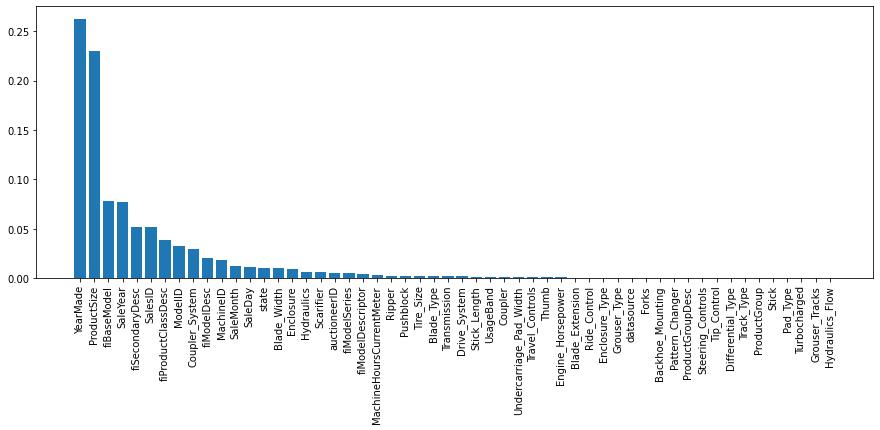

In [49]:
plt.figure(figsize=(15,5))
plt.bar(feature_importance_df['Features'], feature_importance_df['Importance'])
plt.xticks(ticks=feature_importance_df.index, labels=feature_importance_df['Features'], rotation=90)
plt.show()

At the top of the list is **`YearMade`**, this tells us the best predictor of the **`saleprice`** is the **`YearMade`**, a rather intuitive finding. 

The second most important factor is the **`ProductSize`**.

The third is **`fiBaseModel`**.

The fourth is **`SaleYear`**. 

and so on...


*In future implementations of the model, we can remove those variables that have no importance and the performance will not suffer. Additionally, if we are using a different model, say a support vector machine, we could use the random forest feature importances as a kind of feature selection method.*


Let’s quickly make a random forest with only the two most important variables, **`(YearMade 0.262099)`**,**`(ProductSize	0.229964)`** and see how the performance compares.






## Create Utility fuctions to extract important features and train a Regression Model on these features

In [50]:
# Utility functions

def extract_important_features(n,df=feature_importance_df):
  '''Extract 'n'  most important variables'''
  important_variable = df.loc[:n, ['Features']].values
  imp_features = [f for f in important_variable.ravel()] 
  return imp_features


def fit_the_model(X, y, model=RandomForestRegressor):
  '''Train the model on training features X and labels y'''
  rf_important = model(random_state=42)
  rf_important.fit(X,y)
  return rf_important


## Train & Evaluate the model on two most important features
(YearMade 0.262099),(ProductSize 0.229964)

In [51]:
# extract two important features
imp_features = extract_important_features(n=1)
imp_features

['YearMade', 'ProductSize']

In [52]:
# train the model on important features
%%time
rf_important = fit_the_model(X_train[imp_features], y_train)

CPU times: user 12.2 s, sys: 35.9 ms, total: 12.3 s
Wall time: 12.2 s


In [53]:
# Evaluate the model performance
evaluation_fn(rf_important, X_valid[imp_features], y_valid)

Evaluation function : Root Mean Squared Error


0.5847102326838844

## Train & Evaluate the model on 16 most important features 

In [54]:
# extracting importanct features only
imp_features = extract_important_features(n=15)
imp_features

['YearMade',
 'ProductSize',
 'fiBaseModel',
 'SaleYear',
 'fiSecondaryDesc',
 'SalesID',
 'fiProductClassDesc',
 'ModelID',
 'Coupler_System',
 'fiModelDesc',
 'MachineID',
 'SaleMonth',
 'SaleDay',
 'state',
 'Blade_Width',
 'Enclosure']

In [55]:
# train the model on most important features only
%%time
rf_important_2 = fit_the_model(X_train[imp_features], y_train)

CPU times: user 6min 13s, sys: 3.63 s, total: 6min 16s
Wall time: 6min 16s


In [56]:
# evalaute the model performance
evaluation_fn(rf_important_2, X_valid[imp_features], y_valid)

Evaluation function : Root Mean Squared Error


0.25919184874495366

## Visualize the performance

In [57]:
# utility function
# Visualize the prediction
def visualize_model_predicitons(model, n_rows, imp_features  , X=X_valid, y_true=y_valid):
  y_preds = model.predict(X_valid[imp_features])
  fig,ax=plt.subplots(figsize=(15,3))
  plt.plot(y_true[:100].values, color='salmon', marker='^', ls='dotted')
  plt.plot(y_preds[:100], 'g^')
  plt.legend(['true price','predictions'])
  plt.title('True values vs Model Predictions (Random Forest Model trained using first {0} most important features)'.format(len(imp_features)) )
  plt.show()


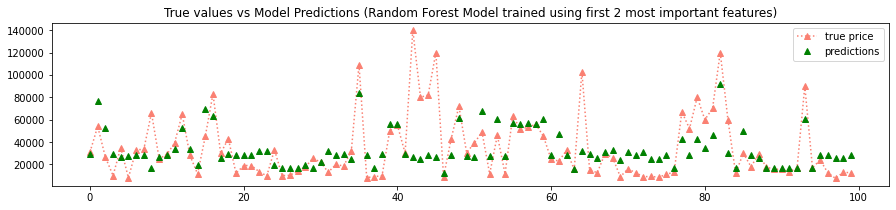

In [58]:
# visualize the performance model trained with 2 most important features
visualize_model_predicitons(rf_important, 100, extract_important_features(n=1))

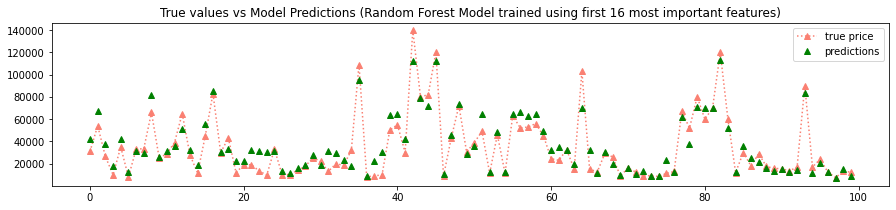

In [59]:
# visualize the performance model trained with 16 most important features
visualize_model_predicitons(rf_important_2, 100, extract_important_features(n=15))

## Baseline model performance visualization
model is trained on all features 

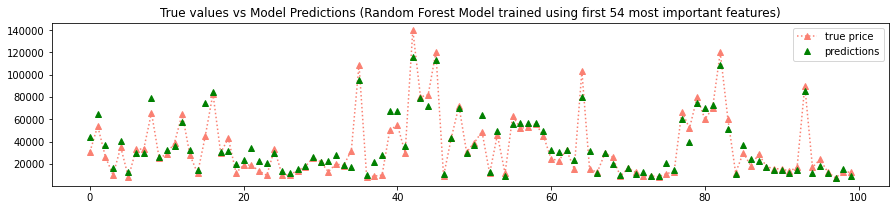

In [60]:
# baseline model which is trained on all features
visualize_model_predicitons(rf,100,X_valid.columns)

In [61]:
# create a dataframe showing the performance of baseline model trained with all features
y_preds_0 = rf.predict(X_valid)
base_df = pd.DataFrame(data={'True val':y_valid.values, 'Prediction':y_preds_0 })
base_df

,True val,Prediction
0,31000.0,44350.00
1,54000.0,65095.00
2,26500.0,37248.25
3,10000.0,16137.50
4,35000.0,40800.00
...,...,...
11568,10000.0,9462.50
11569,10500.0,11165.00
11570,12500.0,9812.50
11571,10000.0,12017.50


# Hyperparameter Tuning

At this point, if we want to improve our model, we could try different hyperparameters (settings) try a different algorithm, or the best approach of all, gather more data! The performance of any model is directly proportional to the amount of valid data it can learn from

we can user GridSearchCV or RandomizedSearchCV for tuning the model

>*sklearn.model_selection.GridSearchCV*
>
>Exhaustive search over specified parameter values for an estimator.

>*sklearn.model_selection.RandomizedSearchCV*
>
>Randomized search on hyper parameters.

In [62]:
param_dict = {
    'max_features':['auto', 'sqrt', 'log2'],
    'random_state':[42]
}

In [63]:
%%time
from sklearn.model_selection import RandomizedSearchCV


rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(),
                              param_distributions=param_dict,
                              n_iter=2,
                              cv=5,
                              scoring='neg_mean_squared_log_error',
                              random_state=42) 

rs_model.fit(X_train[extract_important_features(n=20)], y_train)

CPU times: user 35min 44s, sys: 8.96 s, total: 35min 52s
Wall time: 35min 48s


In [64]:
# best-parameters-found
rs_model.best_params_

{'max_features': 'sqrt', 'random_state': 42}

## Evaluate the tuned model

In [65]:
# evaluation of the RandomizedSearchCV-optimzed-model
evaluation_fn(rs_model, X_valid[extract_important_features(n=20)], y_valid)

Evaluation function : Root Mean Squared Error


0.24558706225377583

## Visualize the performance of tuned model

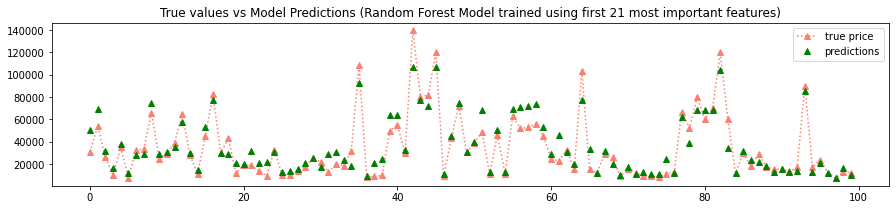

In [66]:
# visualize the model-perfromance
visualize_model_predicitons(rs_model, 100, extract_important_features(n=20))

# Kaggle submission requirements

When looking at the Kaggle submission requirements, we see that if we wanted to make a submission, the data is required to be in a certain format. Namely, a DataFrame containing the SalesID and the predicted SalePrice of the bulldozer.

In [67]:

# Make predictions on the test dataset using the best model
test_preds = rs_model.predict(test_df_preprocessed[extract_important_features(n=20)])

df_submit = pd.DataFrame()
df_submit['SalesID'] = test_df_preprocessed['SalesID'].values
df_submit['SalesPrice'] = test_preds
df_submit.head()

,SalesID,SalesPrice
0,1227829,14734.50
1,1227844,28169.75
2,1227847,48875.00
3,1227848,97330.00
4,1227863,27265.00
